# Desafío Spikelab

## Costos marginales

Carga el archivo costo_marginal_real.csvEstos son los costos marginales reales observados.
Carga el archivo costo_marginal_programado.csv. Estos son los costos marginales previstos por el sistema.
Haz un merge del costos marginal real con el costo marginal programado a nivel de barra (*Ayuda: la columna de join no se llama igual en ambas bases! Los datos venían así del SIC *). Llama a esta nueva base costo_marginal.

Realiza un análisis exploratorio de la base resultante. ¿Qué puedes decir de las distintas variables? ¿Cómo distribuyen? En particular analiza las barras (barra_mnemotecnico). ¿Para cuántas barras se programa el costo? ¿Qué porcentaje es del total de barras que puedes observar en la base?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cm_real = pd.read_csv('costo_marginal_real.csv')
cm_prog = pd.read_csv('costo_marginal_programado.csv')

In [3]:
# barra_referencia_mnemotecnico tiene un único valor
cm_real.describe(include='all')

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,nombre
count,4309951,4309951,4309951,4.309951e+06,4.309951e+06,4.309951e+06,4309951
unique,1020,1,181,NaN,NaN,NaN,1020
top,BA02T005SE028T005,BA02T002SE032T002,2019-04-06,NaN,NaN,NaN,BA S/E LOS PEUMOS 66KV BP1 [NO_MOSTRAR]
freq,4345,4309951,24775,NaN,NaN,NaN,4345
mean,NaN,NaN,NaN,1.250287e+01,6.370691e+01,4.299963e+01,NaN
std,NaN,NaN,NaN,6.923986e+00,2.800696e+01,1.864993e+01,NaN
min,NaN,NaN,NaN,1.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,NaN,NaN,NaN,7.000000e+00,5.065000e+01,3.410719e+01,NaN
50%,NaN,NaN,NaN,1.300000e+01,5.609000e+01,3.799165e+01,NaN
75%,NaN,NaN,NaN,1.900000e+01,6.590000e+01,4.471735e+01,NaN


In [4]:
# Sin valores duplicados
cm_real.duplicated(subset=['barra_mnemotecnico','barra_referencia_mnemotecnico','fecha','hora']).sum()

0

In [5]:
cm_prog.describe(include='all')

,mnemotecnico_barra,nombre_barra,fecha,hora,costo
count,1192124,1192124,1192124,1.192124e+06,1.192124e+06
unique,239,239,181,NaN,NaN
top,-,-,2019-04-06,NaN,NaN
freq,180115,180115,7100,NaN,NaN
mean,NaN,NaN,NaN,1.250298e+01,6.173677e+01
std,NaN,NaN,NaN,6.924053e+00,2.392706e+01
min,NaN,NaN,NaN,1.000000e+00,-5.318478e+01
25%,NaN,NaN,NaN,7.000000e+00,4.977307e+01
50%,NaN,NaN,NaN,1.300000e+01,5.493432e+01
75%,NaN,NaN,NaN,1.900000e+01,6.408541e+01


In [6]:
# 188229 valores duplicados
cm_prog.duplicated(subset=['mnemotecnico_barra','fecha','hora']).sum()

188229

In [7]:
# Botamos los términos duplicados quedándonos con la última aparición por elección
cm_prog.drop_duplicates(subset=['mnemotecnico_barra','fecha','hora'], keep='last', inplace=True, ignore_index=True)
cm_prog.describe()

,hora,costo
count,1.003895e+06,1.003895e+06
mean,1.250298e+01,6.191159e+01
std,6.924052e+00,2.398658e+01
min,1.000000e+00,-5.318478e+01
25%,7.000000e+00,4.997943e+01
50%,1.300000e+01,5.509157e+01
75%,1.900000e+01,6.415794e+01
max,2.500000e+01,6.106000e+02


In [8]:
# Hacemos un inner join para mantener los elementos compartidos por ambos conjuntos de datos
costo_marginal = pd.merge(cm_real, cm_prog, how='inner',left_on=['barra_mnemotecnico','fecha','hora'], right_on=['mnemotecnico_barra','fecha','hora'])

# Se botan las columnas redundantes 
costo_marginal.drop(columns = ['barra_referencia_mnemotecnico','nombre','mnemotecnico_barra','nombre_barra'], inplace=True)
costo_marginal['fecha'] = pd.to_datetime(costo_marginal['fecha'])

In [9]:
# Aquí podemos ver que hay 220 elementos únicos en barra_mnemotecnico
# Además vemos que los datos son del primer semestre del 2019 y que hay un día con 25 horas (probablemente por cambio de hora)
costo_marginal.describe(include='all', datetime_is_numeric=True)

,barra_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,costo
count,900929,900929,900929.000000,900929.000000,900929.000000,900929.000000
unique,220,NaN,NaN,NaN,NaN,NaN
top,BA01L081SE066L081,NaN,NaN,NaN,NaN,NaN
freq,4345,NaN,NaN,NaN,NaN,NaN
mean,NaN,2019-03-28 07:51:20.919431168,12.502900,58.562186,39.509009,61.860504
min,NaN,2019-01-01 00:00:00,1.000000,0.000000,0.000000,-12.113677
25%,NaN,2019-02-12 00:00:00,7.000000,48.430000,32.553260,49.964943
50%,NaN,2019-03-27 00:00:00,13.000000,53.330000,35.967440,55.029404
75%,NaN,2019-05-11 00:00:00,19.000000,60.890000,41.252230,64.107227
max,NaN,2019-06-30 00:00:00,25.000000,791.140000,523.418220,610.600000


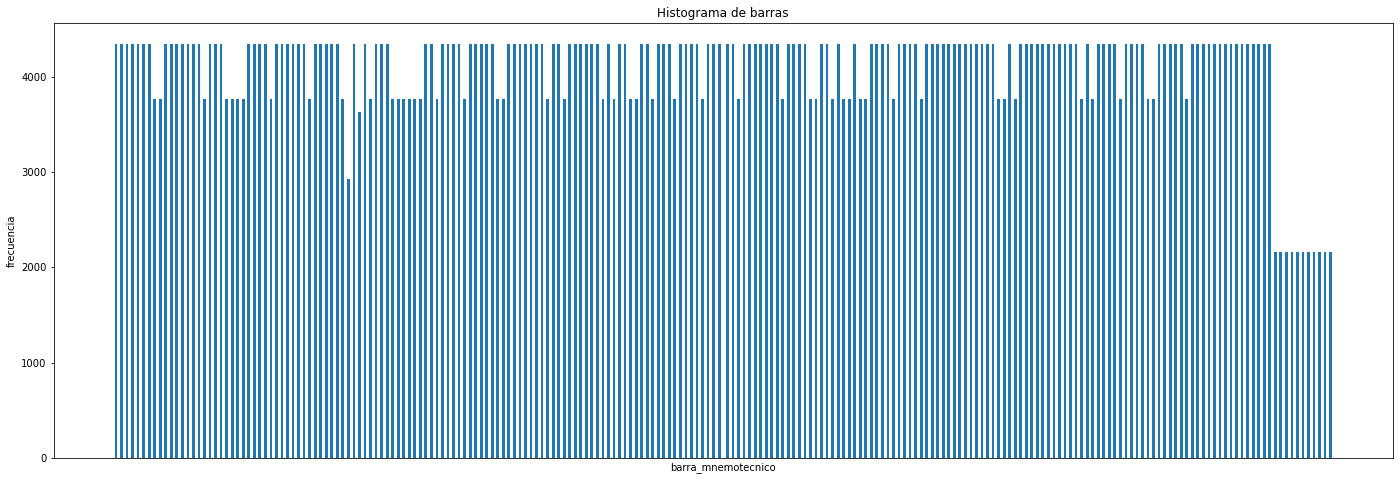

In [10]:
# Histograma de cantidad de apariciones por barra

figsize = (24,8)
plt.figure(figsize=figsize)
_v = plt.hist(costo_marginal['barra_mnemotecnico'],bins=440)
plt.tick_params(
    axis='x',
    which='both', 
    bottom=False,      
    labelbottom=False) 
plt.title('Histograma de barras')
plt.ylabel('frecuencia')
plt.xlabel('barra_mnemotecnico')
plt.show()

In [11]:
n_r = cm_real['barra_mnemotecnico'].unique().size
n_j = costo_marginal['barra_mnemotecnico'].unique().size
print('Hay {} barras mnemotécnicos en los costos reales, sin embargo, hay solo {} que comparten elementos en ambas bases de datos.'.format(n_r,n_j))
print('Esto corresponde al {:.4g}% del barras.'.format(100*n_j/n_r))


Hay 1020 barras mnemotécnicos en los costos reales, sin embargo, hay solo 220 que comparten elementos en ambas bases de datos.
Esto corresponde al 21.57% del barras.


### Distribución de las variables

En los siguientes gráficos vemos la distribución de los valores de costo en dólares, costo en pesos y costos predichos. A primera vista se ven distribuciones con un peak bien definido pero no centrado, sesgado hacia la izquierda. Esto podría indicar que se trata de una distribución log-normal mezclada con valores 0. Para evaluar esto se realiza una transformación logarítmica, sin embargo no pareciera ser una distribución normal por presentar peaks pequeños con multimodalidad, además de estar muy concentrada en torno a la moda. Esto se podría modelar como una mezcla de gaussianas, aunque creo que sería innecesario en primera instancia.

Además es importante rescatar del cuadro de descripción de celdas anteriores que dentro de los costos predichos hay predicciones negativas.

C:\Users\tomva\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


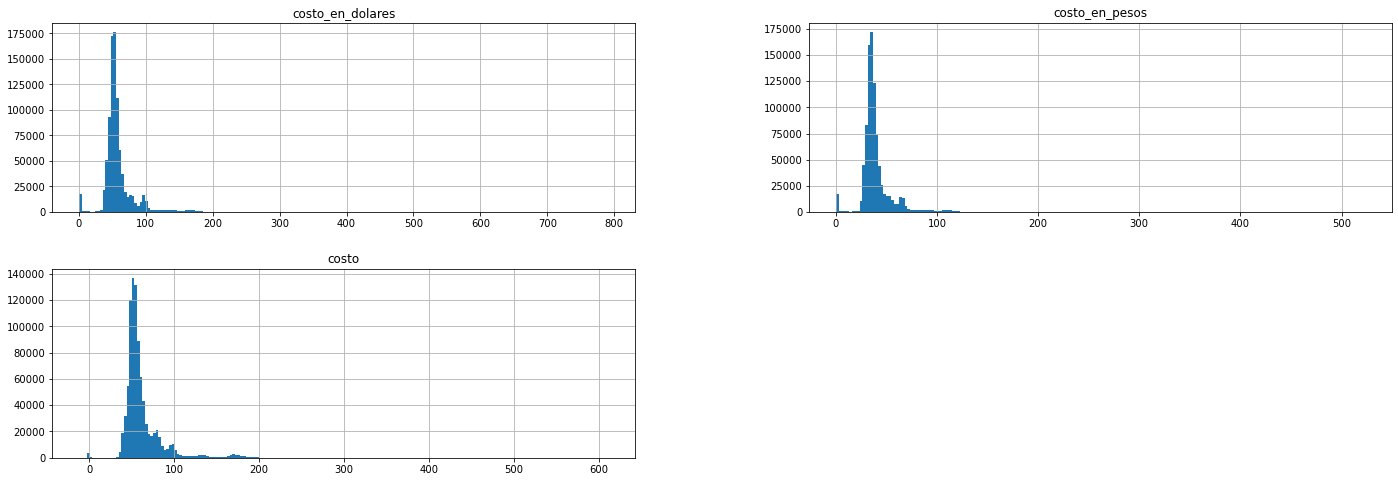

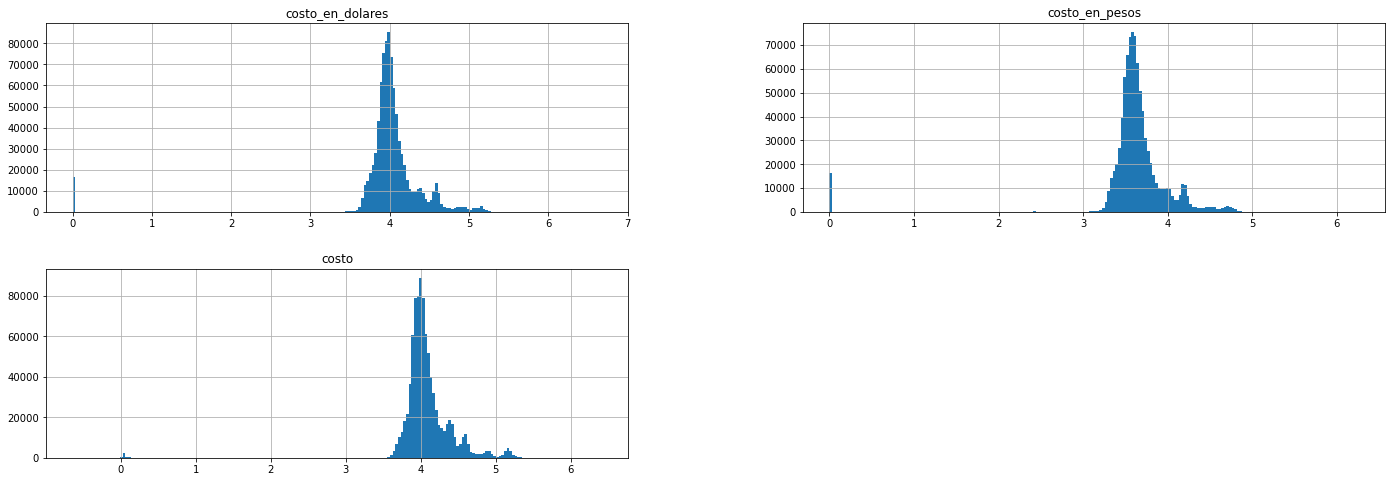

In [12]:
figsize = (24,8)

v_numericas = ['costo_en_dolares','costo_en_pesos','costo']
_ = costo_marginal[v_numericas].hist(figsize=figsize, bins=200)
_ = np.log(1+costo_marginal[v_numericas]).hist(figsize=figsize, bins=200)

En el siguiente histograma siguiente podemos ver que que hay un día con mediciones marcadas para la hora 25, más adelante se ve que esto es en el día 4 de abril del 2019, día de cambio a horario de invierno.

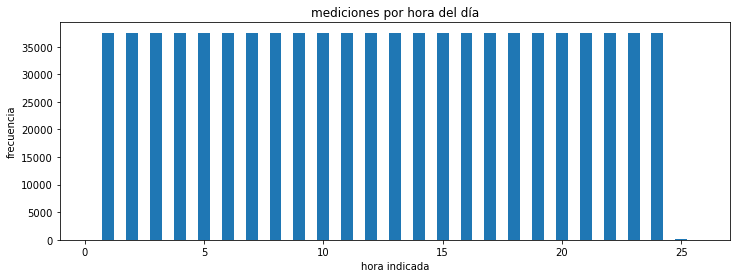

[37530. 37530. 37530. 37530. 37530. 37530. 37530. 37530. 37530. 37530.
 37530. 37530. 37530. 37530. 37530. 37530. 37530. 37530. 37530. 37530.
 37530. 37530. 37530. 37530.   209.]


In [13]:
figsize = (12,4)
plt.figure(figsize=figsize)
plt.ylabel('frecuencia')
plt.xlabel('hora indicada')
plt.title('mediciones por hora del día')
_ = plt.hist(costo_marginal['hora'],bins=np.arange(0.25,26,0.5))
plt.show()
print(_[0][1::2])

In [14]:
costo_marginal[costo_marginal['hora']==25]['fecha'].unique()

array(['2019-04-06T00:00:00.000000000'], dtype='datetime64[ns]')

## Construcción de variables
Construye las siguientes variables para la base que creaste en el punto anterior:

desviación: la diferencia entre el costo real y el costo programado

desviación_pct: la misma desviación, pero en porcentaje

desviacion_cat: una variable categórica que vale 1si la desviación_pct absoluta es mayor a 15% (esto es, si es menor a -15% o mayor a 15%)

Describe la variable desviacion_cat . Qué puedes observar? Cambia a través del tiempo?

In [15]:
costo_marginal['desviacion'] = costo_marginal['costo_en_dolares']-costo_marginal['costo']
costo_marginal['desviacion_pct'] = costo_marginal['desviacion']/costo_marginal['costo_en_dolares']
costo_marginal['desviacion_cat'] = np.abs(costo_marginal['desviacion_pct'])>0.15

In [16]:
costo_marginal['desviacion_cat'].describe()

count     900929
unique         2
top        False
freq      657780
Name: desviacion_cat, dtype: object

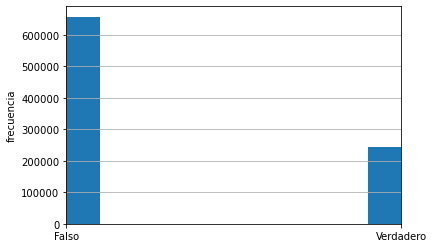

In [17]:
plt.figure()
costo_marginal['desviacion_cat'].astype(int).hist()
plt.ylabel('frecuencia')
plt.xlim(('Falso','Verdadero'))
plt.show()

In [18]:
pct = 100*costo_marginal['desviacion_cat'].sum()/costo_marginal['desviacion_cat'].size
print('El porcentaje de variación porcentual absoluta mayor al 15% corresponde al {:.4}%'.format(pct))

El porcentaje de variación porcentual absoluta mayor al 15% corresponde al 26.99%


## Visualización de datos
Crea la siguiente función: def time_plot_costo_barra(codigo_barra, fecha_inicial, fecha_final):

que tome como input el código de una barra y haga un plot en el tiempo del costo marginal real y del costo marginal programado. El eje x debe ser el tiempo. fecha_inicial y fecha_final_ dan los límites de este plot. Úsa esta función para plotear algunas barras. Acá hay un ejemplo:

<img _ngcontent-oom-c17="" class="card-img" src="https://github.com/SpikeLab-CL/desafio_spike_energia_public/raw/master/plot_barra_costos.png">

Qué puedes concluir de estos plots?

Además, identifica la barra que tiene cmg_real= 0 durante todos los días y elimínala de tu dataset.

In [19]:
costo_agrupado = costo_marginal.groupby('barra_mnemotecnico')
def time_plot_costo_barra(codigo_barra, fecha_inicial, fecha_final):
    '''
    Función que recibe un código y grafica el costo real y el costo programado
    en el periodo indicado
    Parameters:
        codigo_barra (str): Identificador mnemotécnico único
        fecha_inicial (str or datetime): fecha de inicio del gráfico a construir
        fecha_final (str or datetime): fecha de término del gráfico a construir
    '''
    df_para_graficar = costo_agrupado.get_group(codigo_barra)
    df_para_graficar = df_para_graficar[(df_para_graficar['fecha']>=fecha_inicial) & (df_para_graficar['fecha']<=fecha_final)]
    df_para_graficar.sort_values(by = ['fecha','hora'], inplace=True, ignore_index=True)
    
    # Fechas en datetime, de pasa la hora a un delta y se suma a la fecha base
    fechas = df_para_graficar['fecha']+pd.to_timedelta((df_para_graficar['hora']-1).astype(str)+'h')
    
    plt.figure(figsize=(16,4))
    plt.plot(fechas,df_para_graficar['costo_en_dolares'],label='costo real')
    plt.plot(fechas,df_para_graficar['costo'],label='costo predicho')
    plt.title('Costos para la barra {}'.format(codigo_barra))
    plt.ylabel('Costo marginal en dólares')
    plt.xlabel('Fecha')
    plt.legend()
    plt.plot()
    return df_para_graficar
    

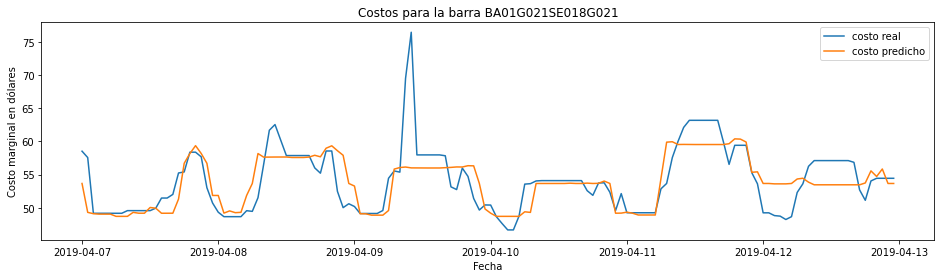

In [20]:
_ = time_plot_costo_barra('BA01G021SE018G021','2019-04-07','2019-04-12')


A continuación se grafican todas las barras disponibles, esto nos permitiría identificar barras con comportamiento real extraño, sin embargo, como ya sabemos que hay alguna cuyo valor es siempre cero, podemos saltarnos este paso y buscar directamente aquellas cuya valor máximo sea menor o igual que 5, esto en caso de que la información no sea tan precisa.

Respecto a los gráficos, podemos ver que existe un comportamiento con desviaciones cortas pero pronunciadas que se desvían de lo que parece ser el valor promedio. Además del gráfico anterior vemos que parecieran tener un comportamiento diario periódico, por lo que la hora del día (además del día del año) deben ser predictores útiles para este tipo de casos.


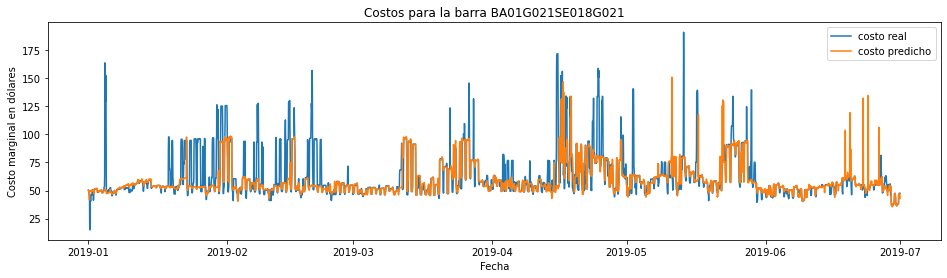

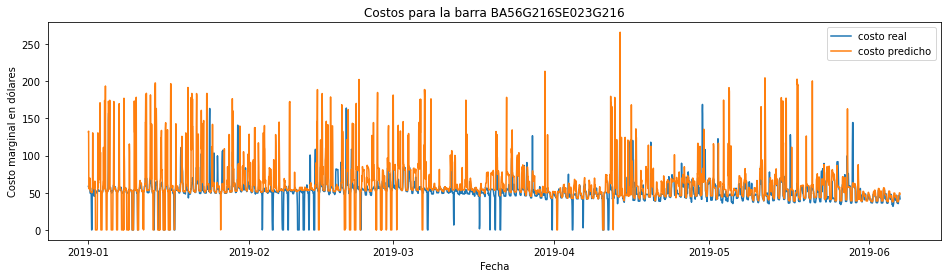

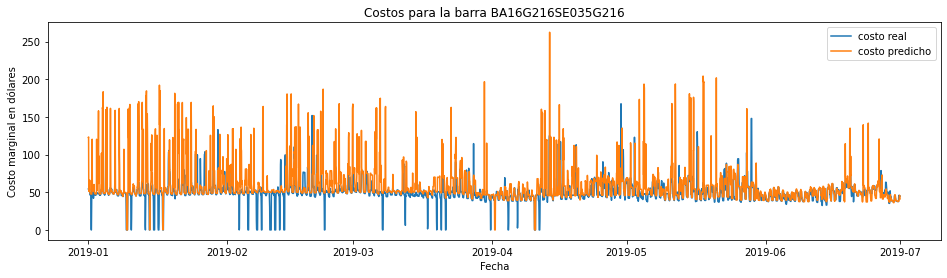

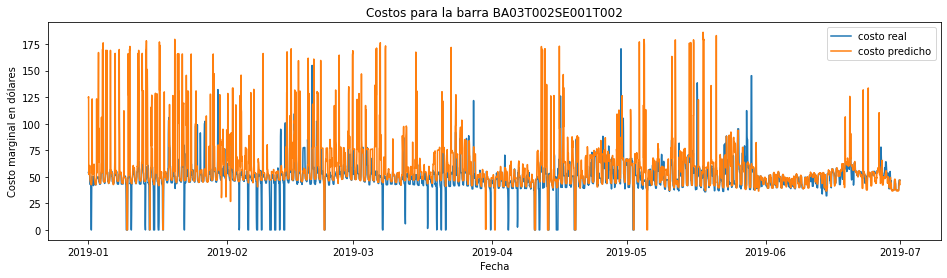

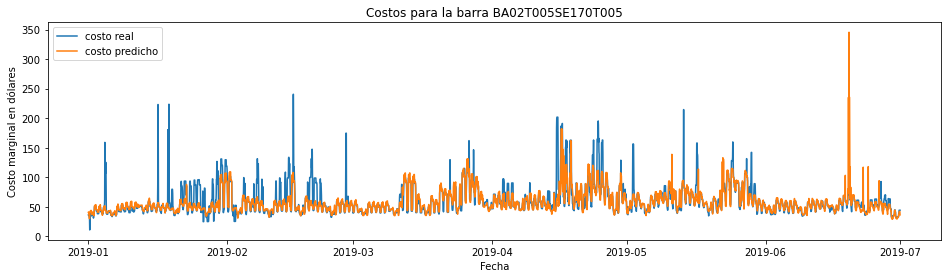

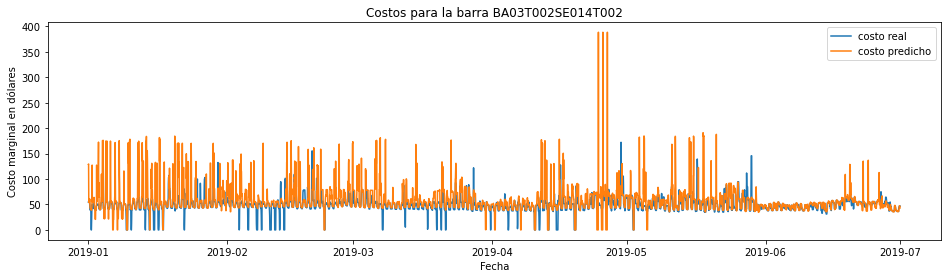

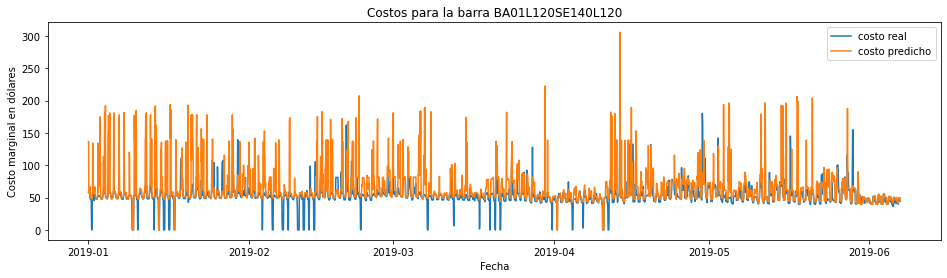

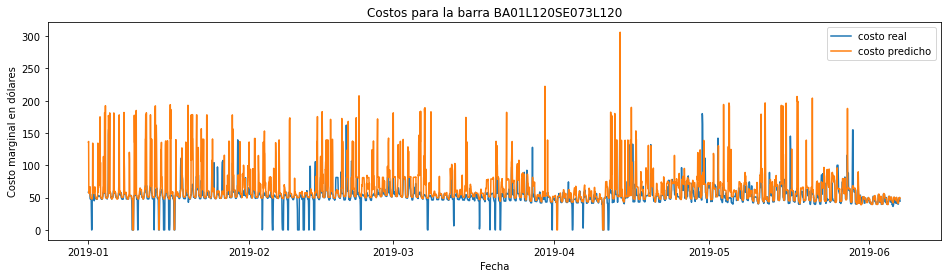

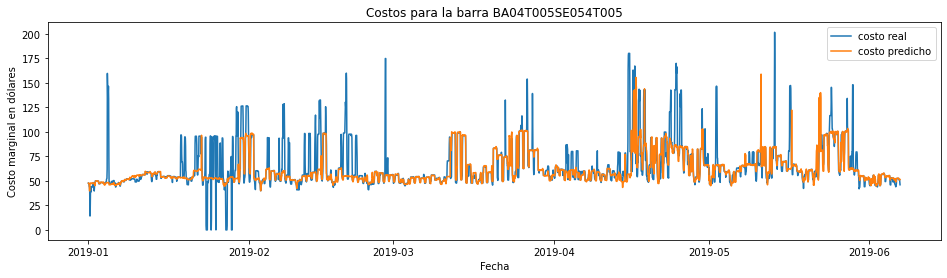

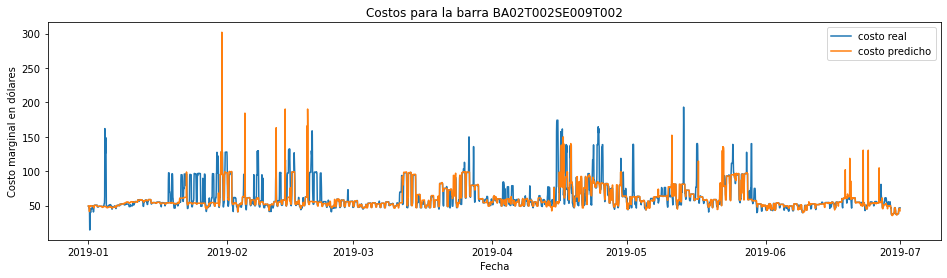

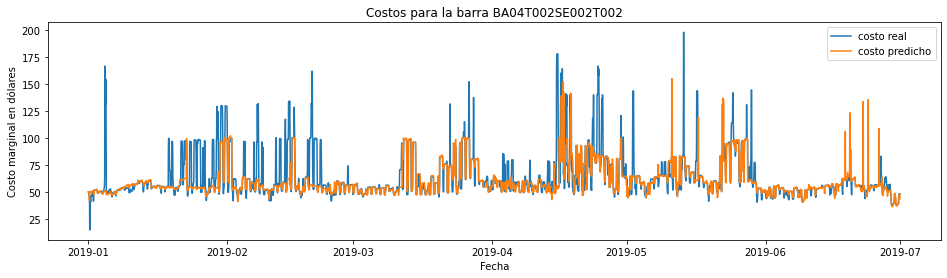

In [21]:
codigos = costo_marginal['barra_mnemotecnico'].unique()
c=0
for cod in codigos:
    if c%20==0:
        _ = time_plot_costo_barra(cod,costo_agrupado.get_group(cod).fecha.min(),costo_agrupado.get_group(cod).fecha.max())
    c+=1

In [22]:
(costo_agrupado['costo_en_dolares'].max()<=5)[(costo_agrupado['costo_en_dolares'].max()<=5)]

barra_mnemotecnico
BA01G049SE001G049    True
Name: costo_en_dolares, dtype: bool

Este caso nos da efectivamente una única barra con valor real máximo menor que 5, a continuación podemos ver su comportamiento

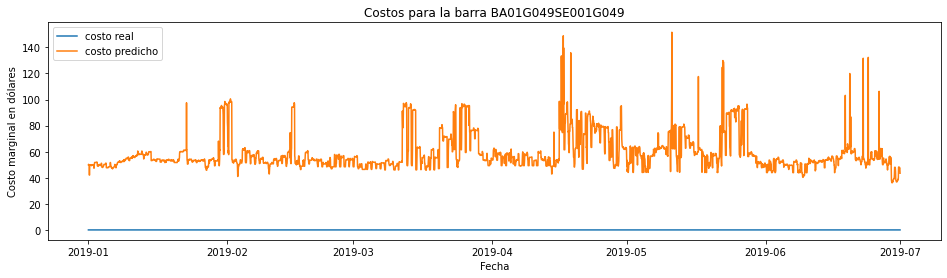

In [23]:
cod = 'BA01G049SE001G049'
_ = time_plot_costo_barra(cod,costo_agrupado.get_group(cod).fecha.min(),costo_agrupado.get_group(cod).fecha.max())

In [24]:
cod = 'BA01G049SE001G049'
costo_marginal = costo_marginal[costo_marginal['barra_mnemotecnico']!=cod]

## Base para los modelos
Carga la base base_para_predicción.csv. Esta será la base principal para las siguientes preguntas.

En rasgos generales, ¿Qué puedes decir de los datos? (dimensiones, tipo de datos, variables categóricas, variables numéricas, fechas).
A partir de la variable fecha, crea nuevas variables para el año, mes, semana del año, dia del calendario, dia de la semana y una variable que indique si el dia corresponde a un día de semana o fin de semana. Estas features/variables te servirán para entrenar el modelo.

Implementa una función que para una subestación y una variable, grafique múltiples series de tiempo diarias correspondientes a una lista de fechas. Para esto, la función debe recibir como argumentos: código de una subestación, una variable (serie numérica), y una lista de fechas (año-mes-día). Por ejemplo: para la subestación SE005T002 y la variable gen_solar_total_mwh, la función debe graficar los perfiles diarios de generación solar por hora para las fechas '2019-01-10', '2019-02-10' y '2019-03-10'.

Grafica la curva de generación solar, por hora, en la subestación SE005T002 para las fechas del 10, 11, 12, 13 y 14 de enero de 2019. Haz lo mismo para la subestación SE127T005. Que podrías decir, en términos generales, sobre la generación solar y las dos subestaciones mencionadas, basados en estos dos gráficos?
Grafica la curva de generación térmica, por hora, en la subestación SE020G213 para los días 14, 15, 16 y 17 de mayo de 2019. Haz lo mismo para la subestación SE106G216. Que podrías decir, en términos generales, sobre la generación térmica en esta subestación con respecto a este gráfico?

In [25]:
base_prediccion = pd.read_csv('base_para_prediccion.csv')
base_prediccion.fecha = pd.to_datetime(base_prediccion.fecha)
base_prediccion.hora = pd.to_timedelta((base_prediccion.hora-1).astype(str)+'h')
print('La dimensión del DataFrame es ',base_prediccion.shape)

La dimensión del DataFrame es  (112779, 15)


In [26]:
base_prediccion.head()

,nemotecnico_se,fecha,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,cmg_desv,cmg_desv_pct,n_barras,demanda_mwh,cap_inst_mw
0,SE031G216,2019-01-04 00:00:00+00:00,0 days 00:00:00,NaN,NaN,NaN,NaN,0.0,56.2,55.627852,0.57,1.02,2,1210767,13.20785
1,SE031G216,2019-01-04 00:00:00+00:00,0 days 01:00:00,NaN,NaN,NaN,NaN,0.0,56.2,55.376645,0.82,1.48,2,113232,13.20785
2,SE031G216,2019-01-04 00:00:00+00:00,0 days 02:00:00,NaN,NaN,NaN,NaN,0.0,56.2,59.531891,-3.33,-5.59,2,1089415,13.20785
3,SE031G216,2019-01-04 00:00:00+00:00,0 days 03:00:00,NaN,NaN,NaN,NaN,0.0,56.2,174.378923,-118.18,-67.77,2,1096867,13.20785
4,SE031G216,2019-01-04 00:00:00+00:00,0 days 04:00:00,NaN,NaN,NaN,NaN,0.0,56.2,172.820310,-116.62,-67.48,2,1071851,13.20785


In [27]:
base_prediccion.describe(include='all', datetime_is_numeric=True)

,nemotecnico_se,fecha,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,cmg_desv,cmg_desv_pct,n_barras,demanda_mwh,cap_inst_mw
count,112779,112779,112779,0.0,0.0,34184.000000,41818.000000,61863.000000,112779.000000,112779.000000,112779.000000,112779.00,112779.000000,1.127790e+05,112779.000000
unique,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,SE014T002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2019-04-01 01:50:48.982560768+00:00,0 days 11:30:10.773282259,NaN,NaN,38.120053,3.764987,40.583146,61.170058,62.215400,-1.045338,inf,2.331844,6.357056e+07,128.719565
min,NaN,2019-01-01 00:00:00+00:00,0 days 00:00:00,NaN,NaN,0.000000,0.000000,0.000000,0.000000,-1.713131,-562.470000,-3403.97,1.000000,-9.821095e+09,2.989800
25%,NaN,2019-02-16 00:00:00+00:00,0 days 06:00:00,NaN,NaN,0.849787,0.000000,0.000000,49.130000,49.906745,-3.790000,-7.07,1.000000,7.464800e+05,18.420000
50%,NaN,2019-04-02 00:00:00+00:00,0 days 12:00:00,NaN,NaN,9.600000,0.000000,0.000000,54.610000,55.420601,-0.310000,-0.58,2.000000,4.507282e+06,51.850000
75%,NaN,2019-05-15 00:00:00+00:00,0 days 18:00:00,NaN,NaN,40.000000,1.571022,15.960000,63.500000,64.701951,1.670000,2.92,3.000000,1.332345e+07,184.685500
max,NaN,2019-06-30 00:00:00+00:00,1 days 00:00:00,NaN,NaN,472.000000,86.050000,570.600800,240.360000,610.600000,175.020000,inf,6.000000,1.004240e+10,597.782800


De esta exploración sabemos de inmediato que hay columnas sin valores como las 'gen_eolica_total_mwh¿ y 'gen_geotermica_total_mwh'. Además vemos que hay 29 nemotécnicos distintos.

In [28]:
(np.array(list(map(lambda x: x.dayofweek,base_prediccion['fecha'])))<5).astype(int)

array([1, 1, 1, ..., 0, 0, 0])

In [29]:
base_prediccion['anio'] = np.array(list(map(lambda x: x.year,base_prediccion['fecha'])))
base_prediccion['mes'] = np.array(list(map(lambda x: x.month,base_prediccion['fecha'])))
base_prediccion['semana'] = np.array(list(map(lambda x: x.week,base_prediccion['fecha'])))
base_prediccion['dia_calendario'] = np.array(list(map(lambda x: x.dayofyear,base_prediccion['fecha'])))
base_prediccion['dia_semana'] = np.array(list(map(lambda x: x.dayofweek,base_prediccion['fecha'])))
base_prediccion['dia_laboral'] = (np.array(list(map(lambda x: x.dayofweek,base_prediccion['fecha'])))<5).astype(int)

In [30]:
def time_plot_se_var(codigo_se, variable, fechas, separadas=True):
    '''
    Función que recibe un código y grafica el costo real y el costo programado
    en el periodo indicado
    Parameters:
        codigo_barra (str): Identificador mnemotécnico único
        fecha_inicial (str or datetime): fecha de inicio del gráfico a construir
        fecha_final (str or datetime): fecha de término del gráfico a construir
    '''
    
    if isinstance(fechas, list):
        lista_de_fechas = fechas
    else:
        lista_de_fechas = [fechas]
    
    df_para_graficar = base_prediccion[base_prediccion['nemotecnico_se']==codigo_se].copy()
    c=0
    for fecha in lista_de_fechas:
        fecha_datetime = pd.to_datetime(fecha) 
        df_fecha_grafica = df_para_graficar[(df_para_graficar.anio==fecha_datetime.year) & 
                                           (df_para_graficar['dia_calendario']==fecha_datetime.dayofyear)]
        
        df_fecha_grafica = df_fecha_grafica.sort_values(by = ['fecha','hora'], ignore_index=True)
        # Fechas en datetime, de pasa la hora a un delta y se suma a la fecha base
        fechas = df_fecha_grafica['fecha']+df_fecha_grafica['hora']

        if c==0 or separadas:
                plt.figure(figsize=(16,4))
                c+=1
        plt.plot(fechas,df_fecha_grafica[variable],label=variable)
        plt.title('Gráfico de {}'.format(variable))
        plt.ylabel(variable)
        plt.xlabel('Día {}'.format(fecha))
        plt.legend()
        if separadas:
            plt.plot()
        
        del(df_fecha_grafica)
    if not separadas:
        plt.plot()
    

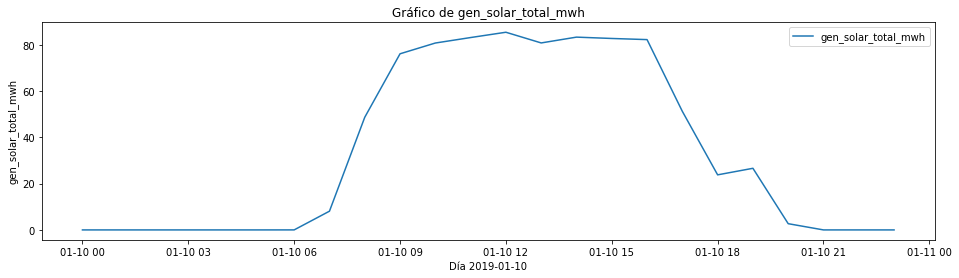

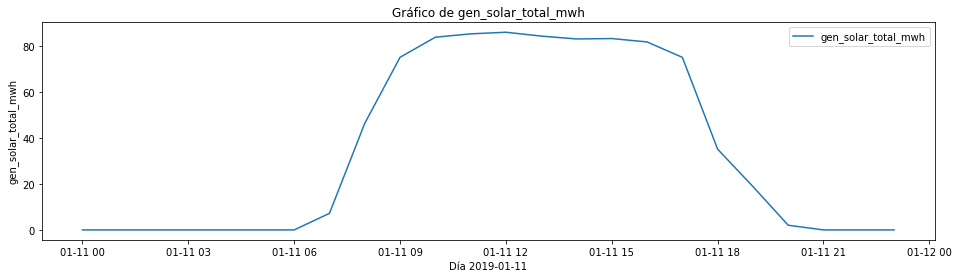

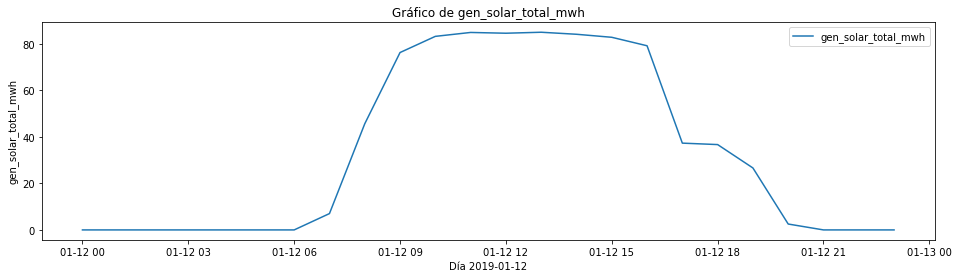

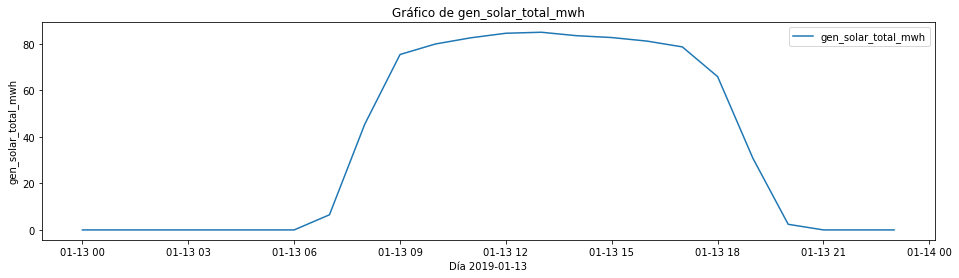

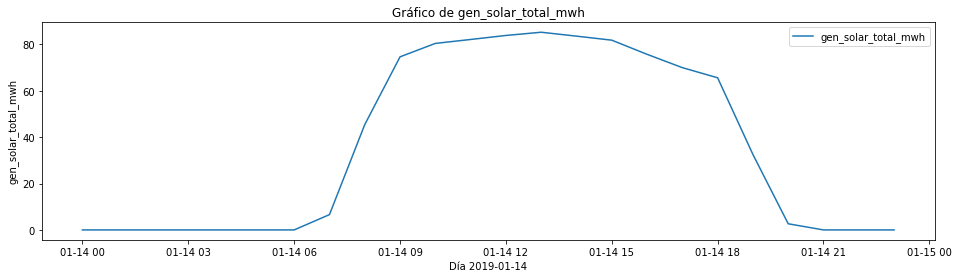

In [31]:
dias = ['2019-01-{:.2}'.format(str(i)) for i in range(10,15)]
time_plot_se_var('SE005T002', 'gen_solar_total_mwh', dias)

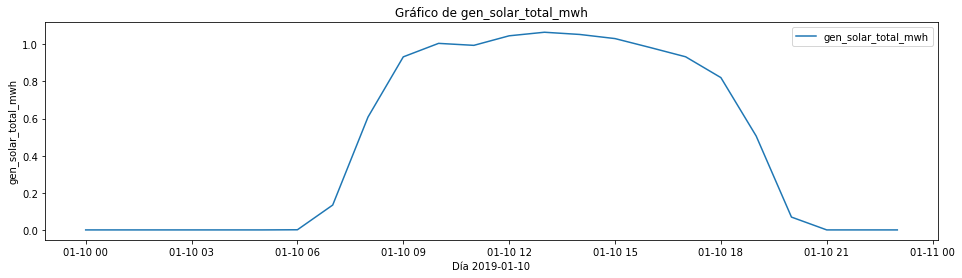

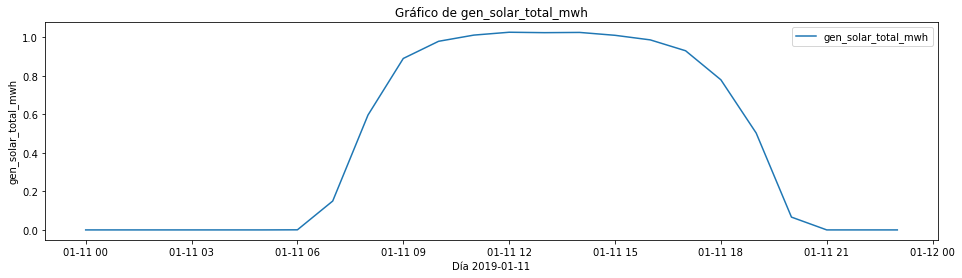

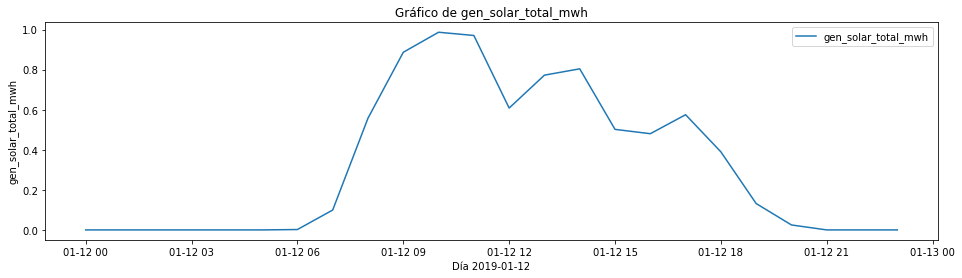

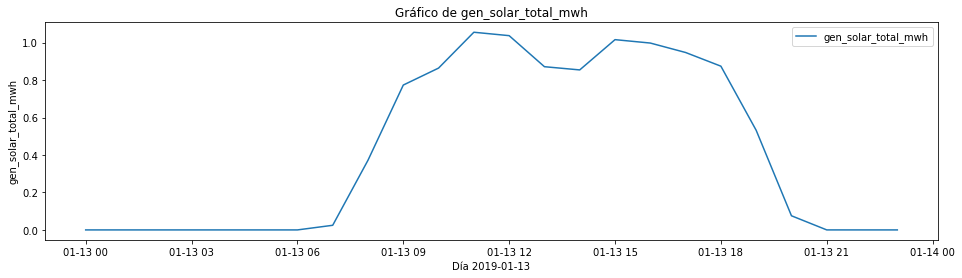

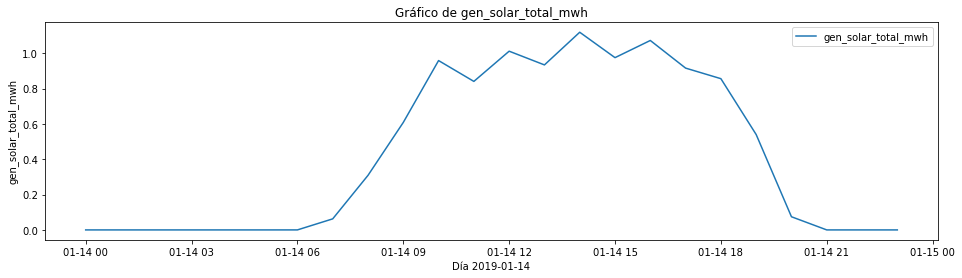

In [32]:
dias = ['2019-01-{:.2}'.format(str(i)) for i in range(10,15)]
time_plot_se_var('SE127T005', 'gen_solar_total_mwh', dias)

En los gráficos anteriores vimos el comportamiento para dos subestaciones de generación de energía solar. Lo primero que resalta es la diferencia de escalas. La primera estación es capaz de generar más de 80 mwh, mientras que la sobrepasa a penas 1 mwh. Sumado a esto, pareciera ser que la generación de la segunda es menos estable, lo que puede sugerir un clima con mayor nubosidad, además de una planta más pequeña y por lo tanto menos resiliente ante oclusiones.

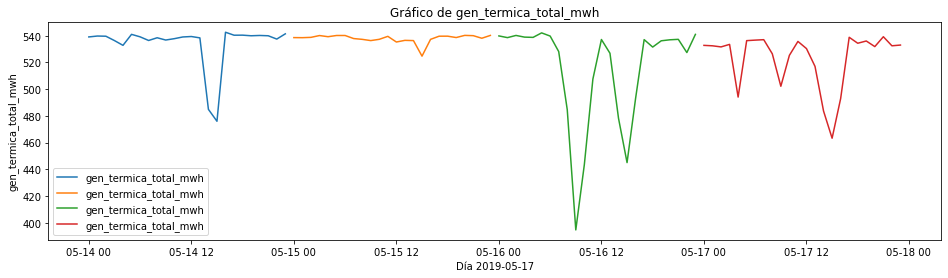

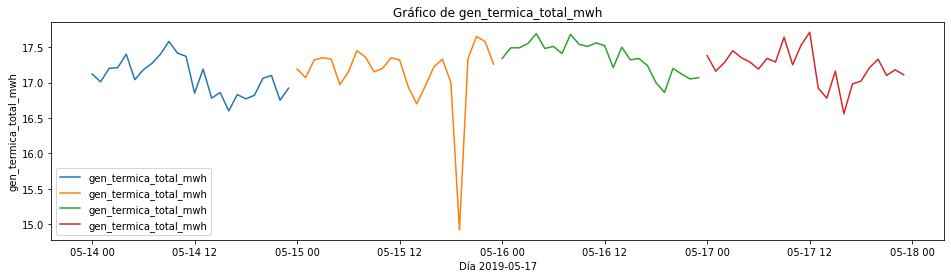

In [33]:
dias = ['2019-05-{:.2}'.format(str(i)) for i in range(14,18)]
time_plot_se_var('SE020G213', 'gen_termica_total_mwh', dias, separadas=False)
time_plot_se_var('SE106G216', 'gen_termica_total_mwh', dias, separadas=False)

Así como en el caso anterior, llama la atención la diferencia de escala, mientras la primera hasta al rededor de 540 mwh, la segunda pareciera no superar los 18 mwh. Pareciera se que en general, pasadas las 13 horas hay una caída en la generación, aunque además de esto, parecieran no tener una correlación muy fuerte.

## Predicción de desviaciones del costo marginal: modelo 1
Crea una variable target que sea igual a cero cuando la variable cmg_desv_pct esté en el rango [-15,15], e igual uno para cualquier otro caso. Hint: recuerda que existen valores infinitos.

Ahora crea los siguientes features:

en_total_mwh: suma de las cinco series de generación.
lags y estadísticas acumuladas (por ejemplo: promedio, varianza) de las variables que consideres relevantes.
Entrena un modelo que prediga si existirá una desviación en la hora siguiente. Adecúa la variable target para hacer esto posible.


¿Cómo le va a tu modelo? ¿En qué métricas te basas y por qué?
¿Cuales son las variables más importantes que considera este modelo?

In [34]:
base_prediccion['target'] = (np.abs(base_prediccion.cmg_desv_pct)>15).astype(int)


In [35]:
gen_list= ['gen_eolica_total_mwh',
       'gen_geotermica_total_mwh', 'gen_hidraulica_total_mwh',
       'gen_solar_total_mwh', 'gen_termica_total_mwh']
base_prediccion['en_total_mwh'] = base_prediccion[gen_list].sum(axis=1)
# Volvemos a hora numérico
base_prediccion['hora'] = np.array(list(map(lambda x: x.seconds/3600,base_prediccion['hora'])))

In [36]:
agrupados = base_prediccion.sort_values(by=['dia_calendario','hora']).groupby(by=['nemotecnico_se'])

In [37]:
# Creamos una lista con los datos separados por estaciones y temporalmente ordenados
lista_agrupados = [agrupados.get_group(grupo) for grupo in list(agrupados.groups.keys())]

In [38]:
lista_agrupados[0].columns

Index(['nemotecnico_se', 'fecha', 'hora', 'gen_eolica_total_mwh',
       'gen_geotermica_total_mwh', 'gen_hidraulica_total_mwh',
       'gen_solar_total_mwh', 'gen_termica_total_mwh', 'cmg_real', 'cmg_prog',
       'cmg_desv', 'cmg_desv_pct', 'n_barras', 'demanda_mwh', 'cap_inst_mw',
       'anio', 'mes', 'semana', 'dia_calendario', 'dia_semana', 'dia_laboral',
       'target', 'en_total_mwh'],
      dtype='object')

In [39]:
nueva_lista_X = []
nueva_lista_y = []
ventana = 12
for grupo in lista_agrupados:
    df = grupo.copy()
    df['tot_media_movil'] = grupo['en_total_mwh'].rolling(ventana, min_periods=ventana).mean()
    df['tot_desviacion_movil'] = grupo['en_total_mwh'].rolling(ventana, min_periods=ventana).std()
    df['cmg_desv_media_movil'] = grupo['cmg_desv'].rolling(ventana, min_periods=ventana).mean()
    df['cmg_desv_desviacion_movil'] = grupo['cmg_desv'].rolling(ventana, min_periods=ventana).std()
    
    # Como los primeros 12 (ventana) son NaN se botan, el último tampoco se utiliza
    # El target empieza una posición (hora) después
    target = df['target'][ventana+1:]
    df = df[ventana:-1].drop(columns=['target','fecha','cmg_desv_pct'])
    
    nueva_lista_X.append(df.copy().values)
    nueva_lista_y.append(target.copy())
    #del(df,target)
    
    

In [40]:
X_temp = np.vstack(nueva_lista_X)
X = X_temp[:,1:].astype(float)
X[np.isnan(X)] = 0
X_se = X_temp[:,0].reshape(-1,1)

y = np.hstack(nueva_lista_y).reshape((-1,1))
print(X.shape,y.shape)

(112402, 23) (112402, 1)


In [41]:
from sklearn.preprocessing import OneHotEncoder
X_se = OneHotEncoder(drop='first').fit_transform(X_se).todense()
print(X_se.shape,X.shape)

(112402, 28) (112402, 23)


In [42]:
X = np.hstack([X_se,X])
print(X.shape,y.shape)

(112402, 51) (112402, 1)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, np.ravel(y_train))
clf.score(X_test, y_test)

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
pred = clf.predict_log_proba(X_test)[:,1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, pred, pos_label=1)
auc_value = auc(fpr, tpr)


In [ ]:
print(auc_value)

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2})'.format(auc_value))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC para el clasificador')
plt.legend()
plt.show()

## Predicción de desviaciones del costo marginal: modelo 2
Ahora imagina que te dicen que, en producción, te enviarán datos actualizados del sistema cada 12 horas. ¿Cuál debiese ser tu target a predecir en ese caso? Explica.

Entrena un nuevo modelo con ese target y evalúalo con una métrica que te parezca importante. ¿Cómo se compara con los resultados del modelo 1?

## Respuesta: 
En este caso una solución es entrenar 12 clasificadores distintos para las doce horas posteriores al menos, aunque pensando en posibilidades de falla o demora sería mejor entrenar a más horas, 16 o incluso 25 para que sea resiliente ante la falta de datos por un período.

## Merge con datos de clima: modelo 3
Haz un merge con los datos de clima (datos_clima.csv) y entrena nuevamente tu modelo 2.

¿Cómo manejas el data leakage en este caso?
¿Cuánto mejora la capacidad predictiva del modelo? ¿Cuáles variables son las más importantes?

In [ ]:
datos_clima = pd.read_csv('datos_clima.csv')

In [ ]:
datos_clima.head()

In [ ]:
datos_clima.describe()

## Respuesta

La principal consideración a tomar es que para efectivamente evaluar un modelo de serie temporal, no se debería hacer la división de manera aleatoria entre entrenamiento, validación y test, porque cuando se quiera usar, se usarán datos futuros. Así, en este caso con seis meses, podríamos entrenar con los primeros 4, validar con el 5to y testear con el 6to. Sin embargo, son muy pocos datos como para encontrar patrones anuales. Hacer esta separación correctamente y no mezclar características futuras sumamente importante.

## Reflexión
¿Por qué sería bueno utilizar un modelo como este para anticiparse a desvíos de precios de la energía?
¿Qué casos de uso te imaginas podrían beneficiarse teniendo acceso a un modelo como este?

## Respuesta

Un modelo como este puede permitir a las empresas generadoras acomodar su producción de acuerdo al predicciones del costo marginal, planificando de manera más eficiente sus producciones.